In [29]:
#Importing the libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

F-MINST dataset is a dataset of Zalando's article images. The dataset consists of 60,000 training examples and 10,000 test examples.
Each example is a 28x28 grayscale image. Each image is associated with a label from 10 classes.

_The labels are as follows:_

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [46]:
#Shape of the dataset
print("Training dataset shape:", train_images.shape, "Training labels shape:", train_labels.shape)
print("Test dataset shape:", test_images.shape, "Test labels shape:", test_labels.shape)

Training dataset shape: (60000, 784) Training labels shape: (60000,)
Test dataset shape: (10000, 784) Test labels shape: (10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

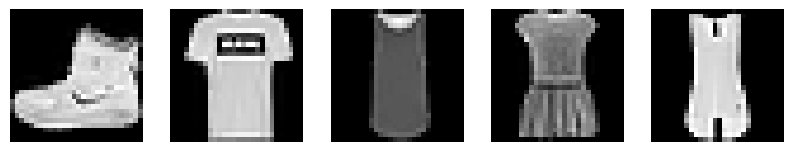

In [32]:
#Plotting the images from the training dataset
plt.figure(figsize=(10,10))
for i in range (5):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show

In [33]:
print("Unique labels in the dataset:", set(train_labels))

Unique labels in the dataset: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [34]:
#Flattening the 28x28 image into dim=1 (784,) vector
train_images = train_images.reshape((60000, 28 * 28)) 
test_images = test_images.reshape((10000, 28 * 28))

In [35]:
#Normalizing the data to the range [0,1] by min-max range
train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255

In [36]:
#Defining the Neural Network Model using Keras
hyperparameters = [512,1024,2048] #Hyperparameters configurations
models = []
for i in hyperparameters:
    model = keras.Sequential([
        layers.Dense(i, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    models.append(model)


In [37]:
for model in models:
    #Configuring the learning process
    model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
    #Training the model
    model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5549 - accuracy: 0.8023
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3850 - accuracy: 0.8587
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3391 - accuracy: 0.8743
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3142 - accuracy: 0.8823
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2936 - accuracy: 0.8908
Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5685 - accuracy: 0.7976
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.3832 - accuracy: 0.8583
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.3392 - accuracy: 0.8733
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3122 - accuracy: 0.8835
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2941 - accuracy: 0.8904
Epoch

In [38]:
models_and_hyperparameters = list(zip(models, hyperparameters))

In [39]:
models_and_hyperparameters

[(<keras.engine.sequential.Sequential at 0x21601509090>, 512),
 (<keras.engine.sequential.Sequential at 0x216007ca490>, 1024),
 (<keras.engine.sequential.Sequential at 0x216015c8850>, 2048)]

In [40]:
predictions = []
for model, i in models_and_hyperparameters:
    prediction = model.predict(test_images)
    predictions.append(prediction)

313/313 [==============================] - 1s 4ms/step


In [41]:
for (model, i), prediction in zip(models_and_hyperparameters, predictions):
    print(f"Predictions for model with {i} neurons in the hidden layer: {prediction}")
    #Evaluating the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"test_acc: {test_acc}")

Predictions for model with 512 neurons in the hidden layer: [[8.93593824e-06 3.05016073e-07 3.94093695e-06 ... 2.51437891e-02
  1.37681680e-04 9.57397640e-01]
 [1.31236575e-05 2.59414816e-11 9.98568177e-01 ... 1.83777906e-12
  3.49401552e-09 9.20038178e-12]
 [9.67179492e-09 1.00000000e+00 1.07201921e-11 ... 9.30625409e-14
  1.42624818e-11 9.01349850e-14]
 ...
 [2.87521136e-04 4.20295382e-10 6.61728518e-06 ... 1.70289155e-07
  9.99641180e-01 3.82055587e-09]
 [1.86503456e-07 9.99991179e-01 1.19948336e-08 ... 7.81472131e-09
  4.78879549e-08 1.89832274e-08]
 [6.93237598e-05 2.29695106e-05 7.91120983e-05 ... 4.65409039e-03
  2.07198504e-03 6.69864676e-05]]
313/313 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8779
test_acc: 0.8779000043869019
Predictions for model with 1024 neurons in the hidden layer: [[2.18164041e-06 5.31786782e-07 9.53386177e-07 ... 6.04547076e-02
  6.05416499e-05 9.38325346e-01]
 [4.67249220e-06 5.53993787e-12 9.99766409e-01 ... 1.41311476e

In [44]:
for (model, i), prediction in zip(models_and_hyperparameters, predictions):
    # Convert probabilities to class labels
    predicted_labels = np.argmax(prediction, axis=1)
    
    # Calculate confusion matrix
    confusion_matrix = tf.math.confusion_matrix(test_labels, predicted_labels)
    
    print(f"Confusion Matrix for model with {i} neurons in the hidden layer:")
    print(confusion_matrix.numpy())

Confusion Matrix for model with 512 neurons in the hidden layer:

 [[876   0  15  13   7   1  77   0  11   0]
 [  5 967   0  19   4   0   3   0   2   0]
 [ 20   0 779   8 123   0  67   0   3   0]
 [ 38   8   7 861  49   0  31   0   6   0]
 [  1   1  83  22 844   0  47   0   2   0]
 [  0   0   0   0   0 984   0  11   2   3]
 [163   1  81  24  94   0 619   0  18   0]
 [  0   0   0   0   0  45   0 940   1  14]
 [  7   0   2   1   5   2   0   2 981   0]
 [  0   0   0   0   0  36   1  35   0 928]]
Confusion Matrix for model with 1024 neurons in the hidden layer:

 [[839   3  45  27   5   2  64   0  15   0]
 [  1 977   1  14   3   0   1   0   3   0]
 [ 11   0 896   7  51   0  27   0   8   0]
 [ 16  25  26 869  41   0  18   0   5   0]
 [  0   0 230  26 719   0  21   0   4   0]
 [  0   0   0   1   0 966   0  24   1   8]
 [138   1 176  35  73   0 547   0  30   0]
 [  0   0   0   0   0  13   0 979   1   7]
 [  1   0   6   2   4   1   0   3 983   0]
 [  0   0   0   1   0   7   1  77   0 914]]
Con

The diagnoal elements represent the number of correct prediction for each image class, while the off-diagnoal elements representes misclassifications.

For instance, in the first model, with 512 neurons, the label 4 (Coat) has been misclassified as 2 (pullover).


_Incorrect Classification Examples_

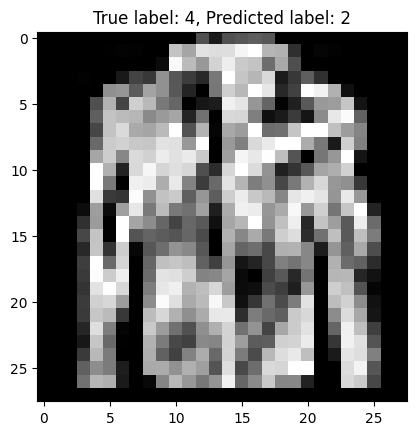

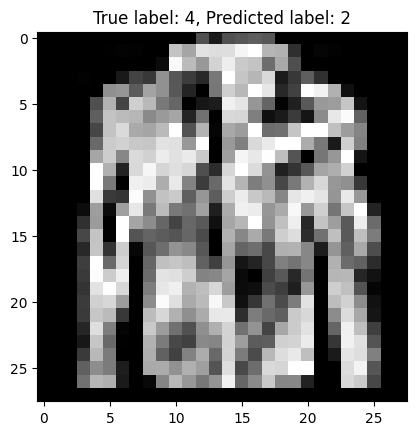

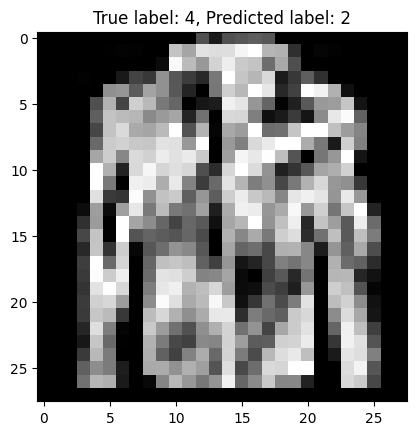

In [54]:
for (model, i), prediction in zip(models_and_hyperparameters, predictions):
    incorrect_examples = []
    for i in range(len(test_labels)):
        if test_labels[i] != predicted_labels[i]:
            incorrect_examples.append((test_images[i].reshape(28, 28), test_labels[i], predicted_labels[i]))

    # Print 1 incorrect examples for each model
    for j in range(min(1, len(incorrect_examples))):
        img, true_label, pred_label = incorrect_examples[j]
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.title(f"True label: {true_label}, Predicted label: {pred_label}")
        plt.show()